In [291]:
from cl_model import Cl_distribution
import networkx as nx
import matplotlib.pyplot as plt
import queue
import random

In [298]:
n = 100
m = 500

<function matplotlib.pyplot.show(*args, **kw)>

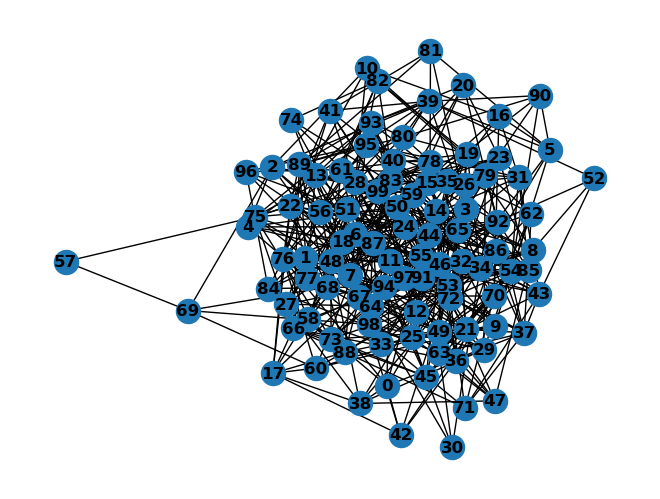

In [299]:
rg = nx.gnm_random_graph(n, m)
nx.draw(rg, with_labels=True, font_weight='bold')
plt.show

In [301]:
# print degree sequence
degree_sequence = list(d for n, d in rg.degree())
print(degree_sequence)
rg.number_of_edges()

[8, 9, 9, 9, 7, 7, 17, 11, 13, 8, 5, 13, 12, 11, 9, 8, 6, 9, 15, 11, 6, 9, 15, 9, 10, 10, 10, 11, 14, 9, 4, 10, 11, 8, 13, 10, 9, 12, 8, 11, 13, 8, 6, 10, 13, 10, 13, 7, 10, 12, 10, 13, 4, 14, 11, 15, 11, 2, 10, 13, 7, 12, 7, 10, 10, 11, 11, 12, 12, 5, 10, 6, 15, 10, 5, 11, 15, 10, 13, 13, 11, 5, 7, 11, 9, 11, 10, 13, 10, 10, 6, 15, 11, 11, 11, 10, 6, 10, 10, 7]


500

In [302]:
cl_helper = Cl_distribution(degree_sequence)
iter = 0
G = nx.Graph()
for i in range (0,n):
    G.add_node(i)
while G.number_of_edges() < m and iter<10000:
    id1 = cl_helper.rvs()
    if G.degree(id1)<degree_sequence[id1]:
        id2 = cl_helper.rvs()
        #while id2==id1 or G.degree(id2)>=degree_sequence[id2]:
            #id2 = cl_helper.rvs()
        if id2==id1 or G.degree(id2)>=degree_sequence[id2]:
            continue
        else:
            G.add_edge(id1,id2)
    iter+=1

500

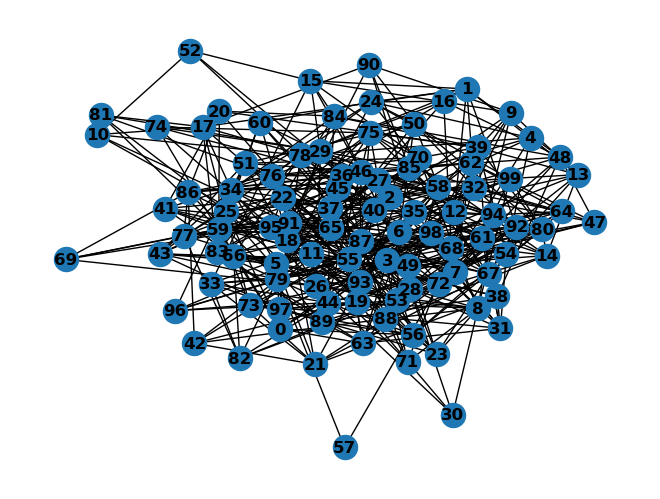

In [303]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show
G.number_of_edges()

In [304]:
# pseudo-clustering coefficient
## choose a node at random, choose two of its neighbors at random, and check if they are connected.

def average_clustering(G, trials=1000):
    triangles = 0
    nodes = G.nodes()
    for i in [int(random.random() * n) for i in range(trials)]:
        # neighbors of i
        nbrs = list(G.adj[i])
        if len(nbrs) < 2:
            continue
        u, v = random.sample(nbrs, 2)
        if u in G[v]:
            triangles +=1
    return triangles / float(trials)

In [305]:
average_clustering(rg)

0.101

In [306]:
average_clustering(G)

0.104